In [41]:
import numpy as np
import pandas as pd
# from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

import pandas as pd
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools
import copy
from collections import Counter
from TrackReconstruction_functions import *


# hits_true = pd.read_hdf("/Users/mistryk2/Packages/nexus/ATPC_eminus_0.1mmstep_slim.h5","MC/hits")
# hits = pd.read_hdf("/Users/mistryk2/Packages/nexus/ATPC_eminus_0.1mmstep_slim_smear_2sigma.h5","hits")

# hits_true = pd.read_hdf("../data/ATPC_gamma/ATPC_gamma_SF0_779551_24.h5", "hits")
# hits      = pd.read_hdf("../data/ATPC_gamma/ATPC_gamma_SF2_780594_24.h5", "hits")

hits_true = pd.read_hdf("../data/ATPC_0nubb/newfiles/ATPC_0nubb_1bar_smear_0.h5", "MC/hits")
hits      = pd.read_hdf("../data/ATPC_0nubb/newfiles/ATPC_0nubb_1bar_5.0percent_smear_0.h5", "MC/hits")
# hits      = pd.read_hdf("../data/ATPC_0nubb/newfiles/ATPC_0nubb_1bar_0.1percent_smear_0.h5", "MC/hits")

display(hits)
print(hits.event_id.unique())

,event_id,x,y,z,energy
0,125,-112.650345,-638.874695,1402.178589,0.001959
1,125,-116.633698,-641.667786,1402.261719,0.001215
2,125,-119.557976,-650.131104,1402.480347,0.002207
3,125,-122.919815,-656.116821,1402.994507,0.000223
4,125,-113.837883,-649.346680,1403.156860,0.000074
...,...,...,...,...,...
127289,184,1843.353638,-1681.198608,2898.891846,0.001314
127290,184,1846.670898,-1686.653076,2899.513916,0.000322
127291,184,1847.559448,-1682.500366,2906.547119,0.000074
127292,184,1842.540405,-1688.742920,2906.561768,0.000050


[125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184]


,event_id,x,y,z,energy
2175,127,-274.382172,718.489868,2560.175049,0.002083
2176,127,-271.217773,717.713196,2560.264404,0.000496
2177,127,-268.645386,716.770996,2561.266113,0.001290
2178,127,-278.143860,721.094238,2561.639648,0.001017
2179,127,-266.774475,716.011597,2562.084961,0.000868
...,...,...,...,...,...
3131,127,763.815674,508.376892,3186.762207,0.006622
3132,127,763.665771,509.265137,3189.118652,0.057511
3133,127,-901.877563,597.262695,3405.752686,0.009821
3134,127,-902.739258,597.004333,3406.047607,0.025643


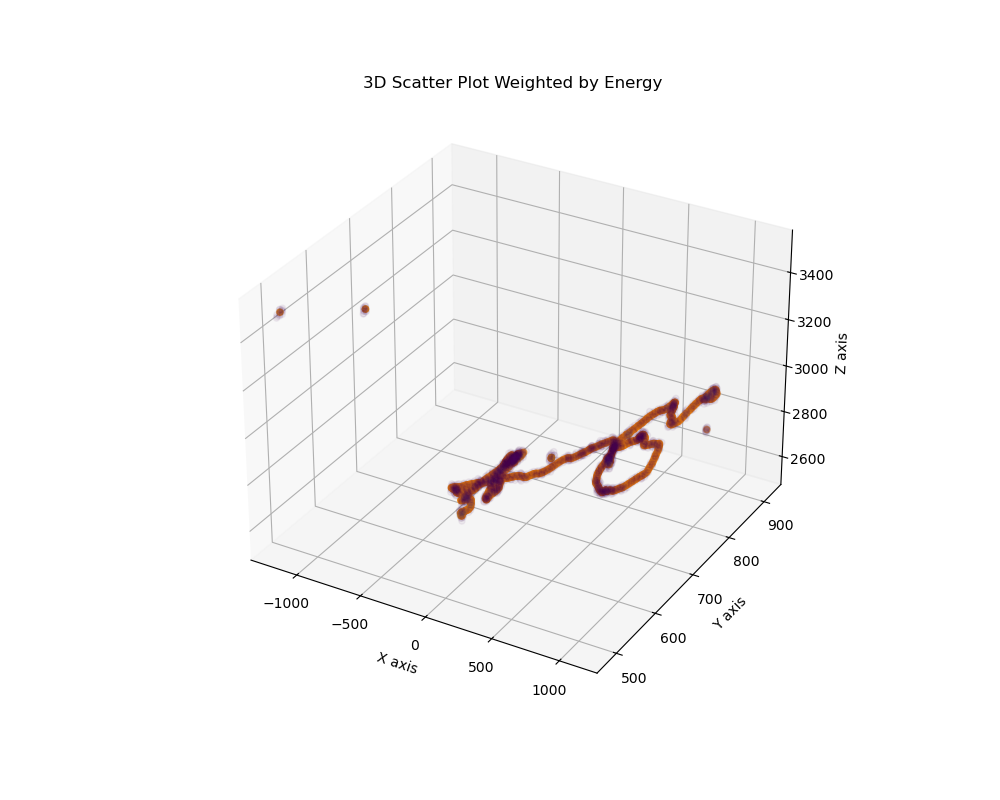

In [42]:
%matplotlib widget 

eid=127

data = hits[hits.event_id ==eid]
data_true = hits_true[hits_true.event_id ==eid]
display(data_true)


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


cut_data = data[data.energy > 0.000]

# Normalize the energy values for the colors
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(cut_data.energy.min(), cut_data.energy.max())
colors = cmap(norm(cut_data.energy))


# Plot the scatter plot
scatter = ax.scatter(cut_data.x, cut_data.y, cut_data.z, c=colors, marker='o', alpha=0.05)
ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o', c="DarkOrange")

# ax.scatter(data_true['x'], data_true['y'], data_true['z']+3000, marker='o', c="DarkRed")

# Add color bar to indicate energy values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(data.energy)
# cbar = plt.colorbar(mappable)
# cbar.set_label('Energy')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot Weighted by Energy')

plt.show()

In [43]:
# There seems to be a duplicate row sometimes
data = data.drop_duplicates()

# display(data)
data = data[['event_id','x', 'y', 'z',"energy"]]

# shuffle the data to ensure we dont use g4 ordering
data = data.sample(frac=1).reset_index(drop=True)

# then sort it based on the x,y,z
data = data.sort_values(by=['x', "y", "z"]).reset_index(drop=True)

# Calculate the distance matrix
dist_matrix = distance_matrix(data[['x', 'y', 'z']], data[['x', 'y', 'z']])

display(data)
print(len(dist_matrix))

,event_id,x,y,z,energy
0,127,-1196.972046,496.070099,3491.971436,0.000223
1,127,-1196.916138,491.766479,3484.181396,0.000099
2,127,-1196.593262,491.639496,3506.781738,0.000248
3,127,-1196.518311,491.102966,3499.033936,0.003646
4,127,-1196.358398,491.281982,3491.192627,0.002579
...,...,...,...,...,...
1990,127,1105.801147,817.094421,3049.402344,0.000322
1991,127,1105.861938,815.566895,3043.251953,0.000099
1992,127,1106.419312,812.929443,3048.645264,0.000322
1993,127,1106.525635,813.998962,3066.273682,0.000050


1995


20
Mean z: 2869.5786  diffusion =  5.081949185059927
Mean Sigma:  10
581 2.455100793071324


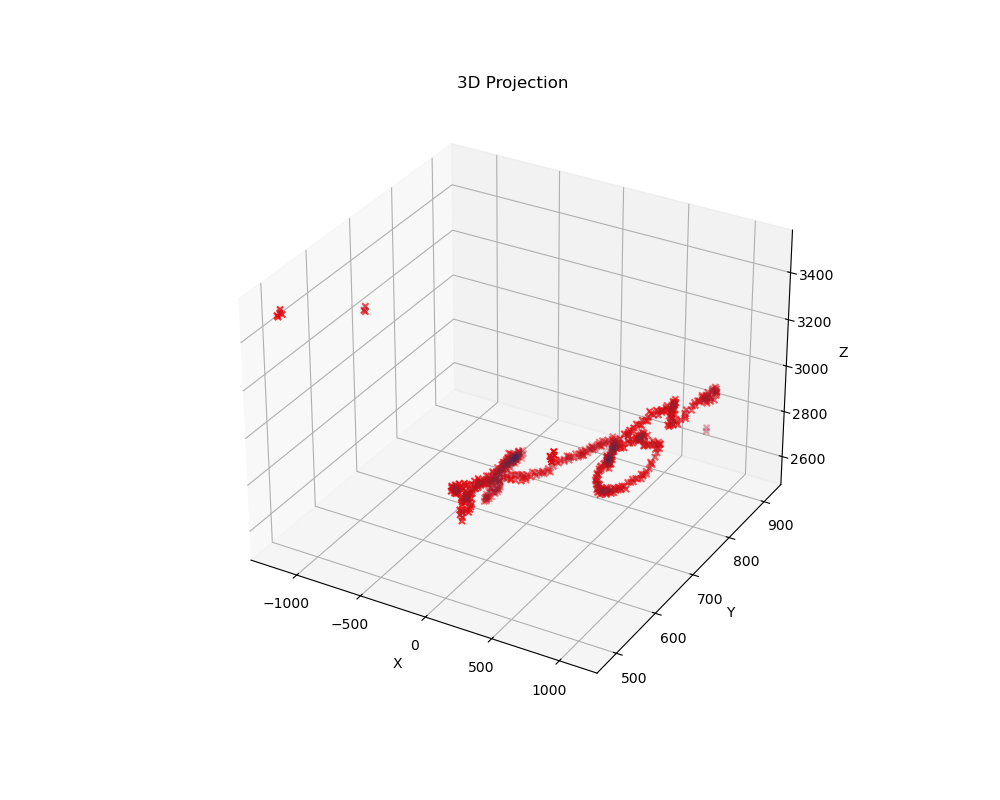

In [44]:

# all_visited = []
radius  = 20 # workes well for 2 sigma c02 mix
# radius  = 0.5*np.sqrt(data.z.mean())
print(radius)


def GetMinima(index, all_visited_, input_data, temp_dist_matrix, R):


    distances_from_index = temp_dist_matrix[index] # distances for node to others
    sorted_indices = np.argsort(distances_from_index) # indexes sorted by smallest distance

    closest_nodes = sorted_indices[distances_from_index[sorted_indices] < R]
    
    closest_nodes = list(set(closest_nodes) - set(all_visited_))

    selected_rows = input_data.iloc[closest_nodes] # Df containing the nodes within distance

    # Compute the mean of x, y, and z columns
    mean_x = selected_rows['x'].median()
    mean_y = selected_rows['y'].median()
    mean_z = selected_rows['z'].median()
    energy_sum = selected_rows['energy'].sum()
    mean_point = np.array([mean_x, mean_y, mean_z, energy_sum])

    all_visited = all_visited_ + list(closest_nodes)

    return mean_point, all_visited


def Cluster(input_data, R):

    node_centers = []
    all_visited = []
    indexes = input_data.index.values
    indexes_set = set(indexes)

    temp_dist_matrix = distance_matrix(input_data[['x', 'y', 'z']], input_data[['x', 'y', 'z']])

    for i in range(len(input_data)):

        all_visited_set = set(all_visited)

        # Convert arrays to sets and perform the difference
        filtered_indexes = list(indexes_set - all_visited_set)

        if not filtered_indexes:
            break

        # random_index = np.random.choice(filtered_indexes)
        random_index = filtered_indexes[0]
        median, all_visited = GetMinima(random_index, all_visited, input_data, temp_dist_matrix, R)

        node_centers.append(median)

    return pd.DataFrame(node_centers, columns=['x', 'y', 'z', 'energy'])


print("Mean z:", data.z.mean(), " diffusion = ", 0.3*np.sqrt(0.1*data.z.mean()))

mean_sigma = round(2*0.3*np.sqrt(0.1*data.z.mean()))
print("Mean Sigma: ", mean_sigma)

node_centers_df = Cluster(data, mean_sigma)
# node_centers_df = Cluster(node_centers_df, 20)
# node_centers_df = Cluster(node_centers_df, 30)
# node_centers_df = Cluster(node_centers_df, 20)
# node_centers_df = Cluster(node_centers_df, 20)
# node_centers_df = Cluster(node_centers_df, 75)

# display(node_centers_df)
print(len(node_centers_df), node_centers_df.energy.sum())

# -------

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data['x'], data['y'], data['z'], marker='o',alpha=0.01)
# ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o')

ax.scatter(node_centers_df['x'], node_centers_df['y'], node_centers_df['z'], marker='x',c="r")



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Projection')
plt.show()



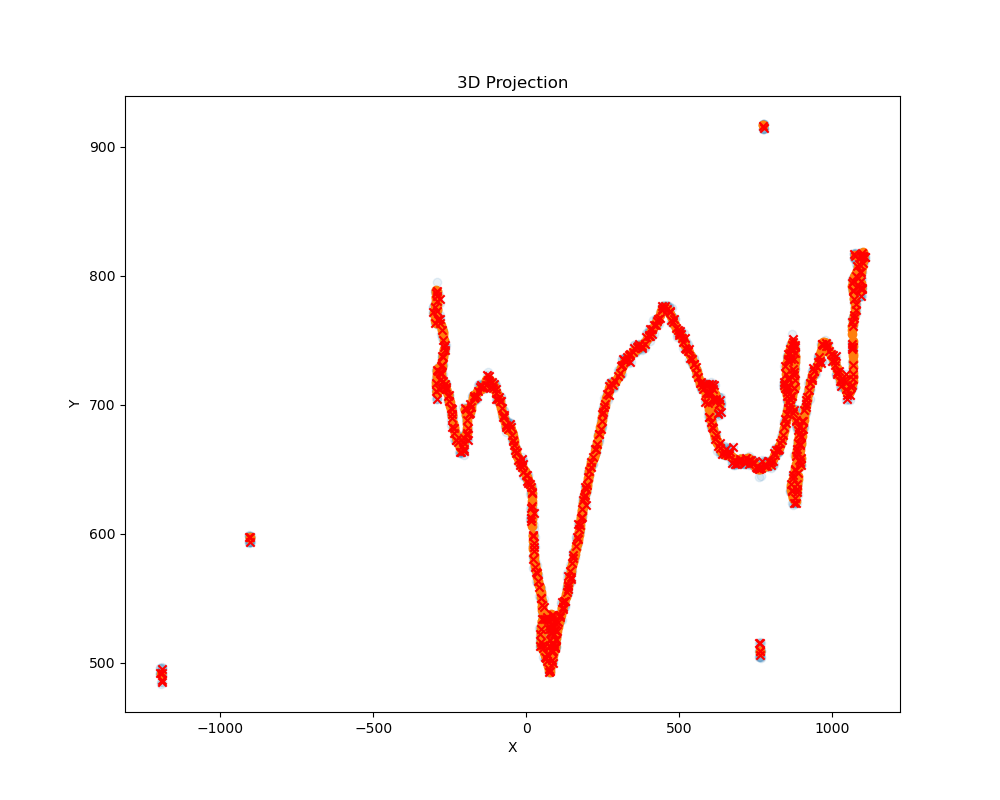

In [45]:
fig= plt.figure(figsize=(10, 8))

plt.scatter(data['x'], data['y'], marker='o',alpha=0.1)
plt.scatter(data_true['x'], data_true['y'], marker='o')
plt.scatter(node_centers_df['x'], node_centers_df['y'], marker='x',c="r")

plt.xlabel('X')
plt.ylabel('Y')

plt.title('3D Projection')
plt.show()


In [46]:
# Create the bins ---- 
xmin=-3000
xmax=3000
xbw=mean_sigma*4

ymin=-3000
ymax=3000
ybw=mean_sigma*4

zmin=0
zmax=6000
zbw=mean_sigma*4

# bw = 10 works well for co2 mix with 2 sigma diffusion

# bins for x, y, z
xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = np.arange(ymin, ymax+ybw, ybw)
zbins = np.arange(zmin, zmax+zbw, zbw)

# center bins for x, y, z
xbin_c = xbins[:-1] + xbw / 2
ybin_c = ybins[:-1] + ybw / 2
zbin_c = zbins[:-1] + zbw / 2


print(ybins)

databin = node_centers_df.copy()
databin["event_id"] = eid

# Now lets bin the data
databin['x_smear'] = pd.cut(x=databin['x'], bins=xbins,labels=xbin_c, include_lowest=True)
databin['y_smear'] = pd.cut(x=databin['y'], bins=ybins,labels=ybin_c, include_lowest=True)
databin['z_smear'] = pd.cut(x=databin['z'], bins=zbins,labels=zbin_c, include_lowest=True)



# Drop rows with any NaN values
databin = databin.dropna()

# Dictionary to store results
aggregated_data = {}

# Iterate through the DataFrame row by row
for _, row in databin.iterrows():
    key = (row['event_id'], row['x_smear'], row['y_smear'], row['z_smear'])
    
    if key not in aggregated_data:
        # Initialize the aggregation for a new group
        aggregated_data[key] = {
            'x_sum': row['x'],
            'y_sum': row['y'],
            'z_sum': row['z'],
            'energy_sum': row['energy'],
            'count': 1
        }
    else:
        # Update existing group values
        aggregated_data[key]['x_sum'] += row['x']
        aggregated_data[key]['y_sum'] += row['y']
        aggregated_data[key]['z_sum'] += row['z']
        aggregated_data[key]['energy_sum'] += row['energy']
        aggregated_data[key]['count'] += 1

# Convert aggregated data into a DataFrame
result = []
for key, values in aggregated_data.items():
    event_id, x_smear, y_smear, z_smear = key
    result.append({
        'event_id': event_id,
        'x_smear': x_smear,
        'y_smear': y_smear,
        'z_smear': z_smear,
        'x': values['x_sum'] / values['count'],   # Mean x
        'y': values['y_sum'] / values['count'],   # Mean y
        'z': values['z_sum'] / values['count'],   # Mean z
        'energy': values['energy_sum']            # Sum energy
    })

# Create final DataFrame
databin = pd.DataFrame(result)
display(databin)


[-3000 -2960 -2920 -2880 -2840 -2800 -2760 -2720 -2680 -2640 -2600 -2560
 -2520 -2480 -2440 -2400 -2360 -2320 -2280 -2240 -2200 -2160 -2120 -2080
 -2040 -2000 -1960 -1920 -1880 -1840 -1800 -1760 -1720 -1680 -1640 -1600
 -1560 -1520 -1480 -1440 -1400 -1360 -1320 -1280 -1240 -1200 -1160 -1120
 -1080 -1040 -1000  -960  -920  -880  -840  -800  -760  -720  -680  -640
  -600  -560  -520  -480  -440  -400  -360  -320  -280  -240  -200  -160
  -120   -80   -40     0    40    80   120   160   200   240   280   320
   360   400   440   480   520   560   600   640   680   720   760   800
   840   880   920   960  1000  1040  1080  1120  1160  1200  1240  1280
  1320  1360  1400  1440  1480  1520  1560  1600  1640  1680  1720  1760
  1800  1840  1880  1920  1960  2000  2040  2080  2120  2160  2200  2240
  2280  2320  2360  2400  2440  2480  2520  2560  2600  2640  2680  2720
  2760  2800  2840  2880  2920  2960  3000]


,event_id,x_smear,y_smear,z_smear,x,y,z,energy
0,127.0,-1180.0,500.0,3500.0,-1193.179639,490.050812,3490.925244,0.029884
1,127.0,-900.0,580.0,3380.0,-906.040771,597.806946,3393.609375,0.013566
2,127.0,-900.0,580.0,3420.0,-903.502625,595.646973,3410.735352,0.021650
3,127.0,-300.0,780.0,2620.0,-292.644229,773.170878,2606.511447,0.095926
4,127.0,-300.0,780.0,2580.0,-290.168419,777.118866,2592.265076,0.059917
...,...,...,...,...,...,...,...,...
126,127.0,1060.0,780.0,3060.0,1070.550344,780.180323,3064.248962,0.065249
127,127.0,1060.0,820.0,3060.0,1073.666199,815.933899,3056.885742,0.060562
128,127.0,1100.0,820.0,3020.0,1092.604574,806.801595,3034.159017,0.003398
129,127.0,1100.0,780.0,3060.0,1092.608154,791.675720,3063.966902,0.068448


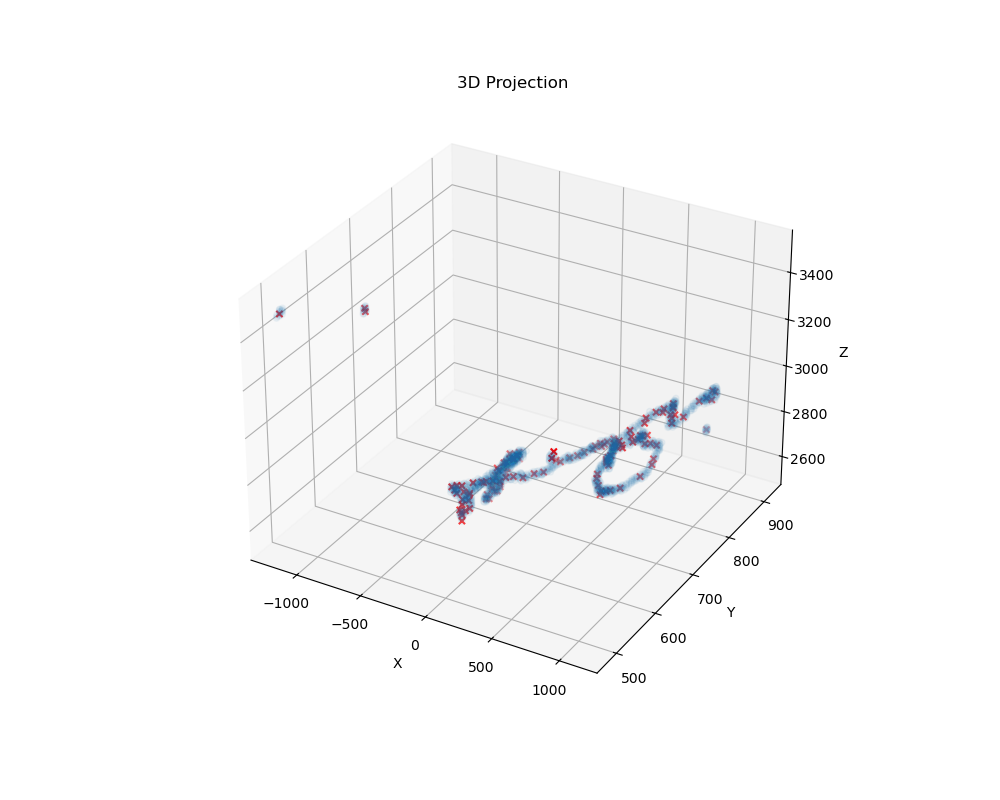

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data['x'], data['y'], data['z'], marker='o',alpha=0.05)
# ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o',color="Teal")

ax.scatter(databin['x'], databin['y'], databin['z'], marker='x',c="r")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Projection')
plt.show()

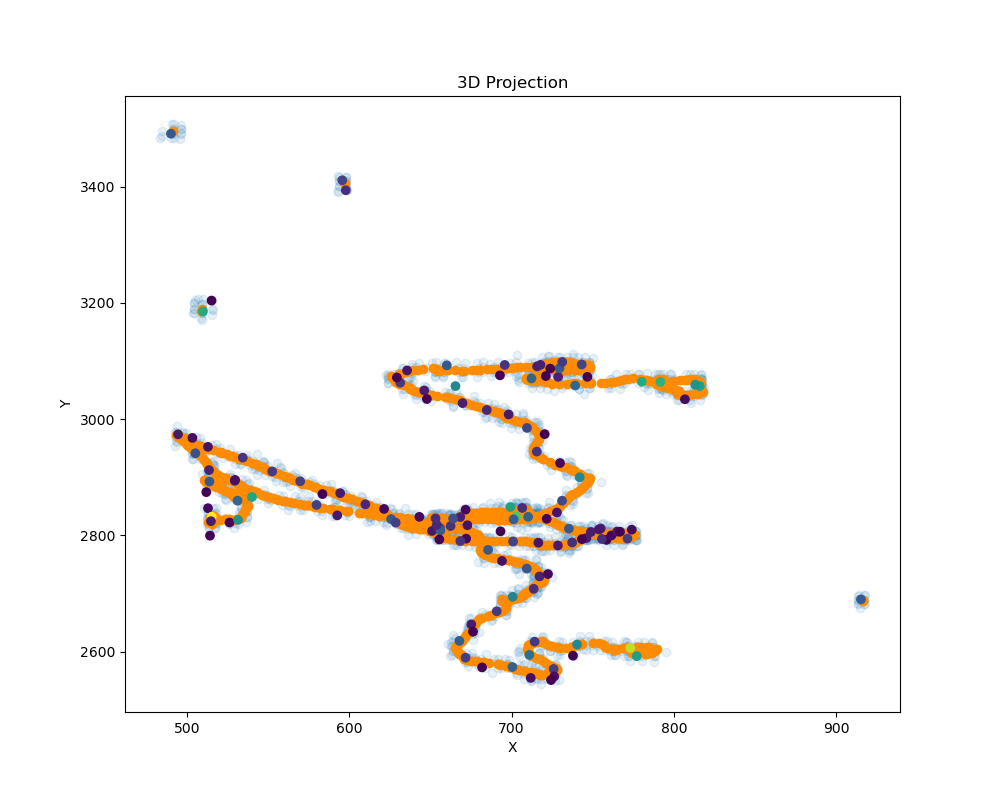

In [48]:
fig= plt.figure(figsize=(10, 8))

plt.scatter(data['y'], data['z'], marker='o',alpha=0.1)
plt.scatter(data_true['y'], data_true['z'], marker='o',color="DarkOrange")
# plt.scatter(data_true['y'], data_true['z'], marker='o',c=data_true["energy"])
plt.scatter(databin['y'], databin['z'], marker='o',c=databin['energy'])

plt.xlabel('X')
plt.ylabel('Y')

plt.title('3D Projection')
plt.show()

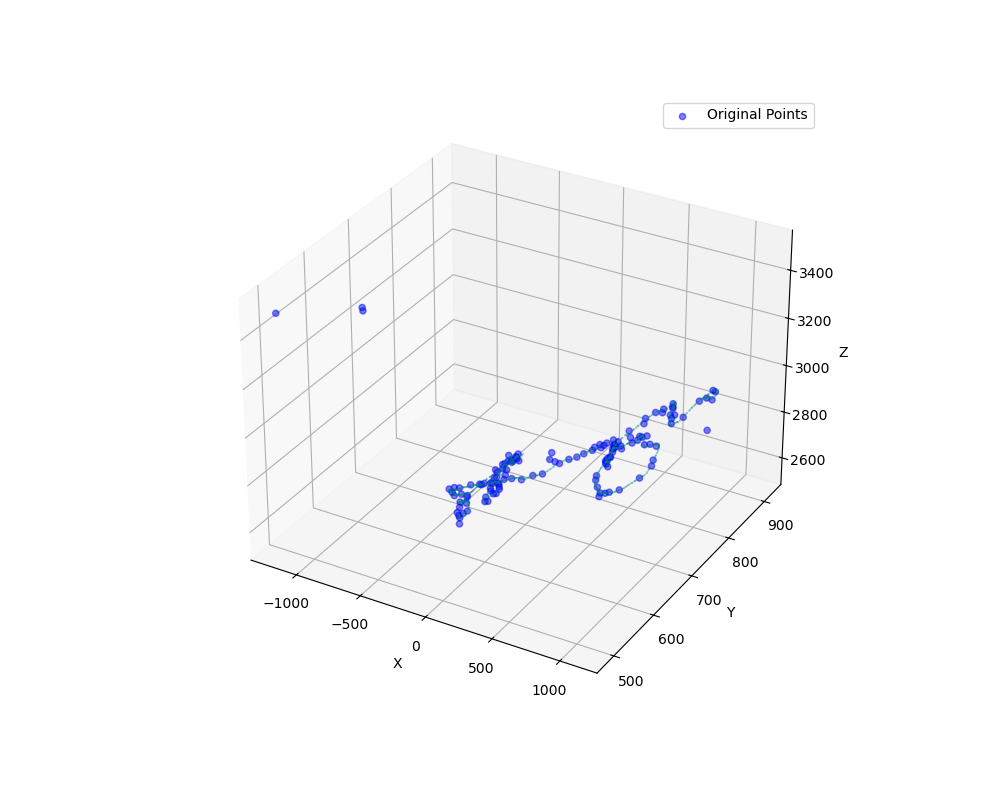

In [49]:

# Plot the original points and the polynomial fit
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(databin.x, databin.y,databin.z, color='blue', label='Original Points', alpha=0.5)
ax.scatter(data_true['x'], data_true['y'], data_true['z'],s=0.1 ,marker='o',color="Teal")

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

,event_id,x_smear,y_smear,z_smear,x,y,z,energy
0,127.0,-1180.0,500.0,3500.0,-1193.179639,490.050812,3490.925244,0.029884
1,127.0,-900.0,580.0,3380.0,-906.040771,597.806946,3393.609375,0.013566
2,127.0,-900.0,580.0,3420.0,-903.502625,595.646973,3410.735352,0.021650
3,127.0,-300.0,780.0,2620.0,-292.644229,773.170878,2606.511447,0.095926
4,127.0,-300.0,780.0,2580.0,-290.168419,777.118866,2592.265076,0.059917
...,...,...,...,...,...,...,...,...
126,127.0,1060.0,780.0,3060.0,1070.550344,780.180323,3064.248962,0.065249
127,127.0,1060.0,820.0,3060.0,1073.666199,815.933899,3056.885742,0.060562
128,127.0,1100.0,820.0,3020.0,1092.604574,806.801595,3034.159017,0.003398
129,127.0,1100.0,780.0,3060.0,1092.608154,791.675720,3063.966902,0.068448


Median distance to the closest row: 20.63340776646485
Dist Thresh 104.756
Pass Flag: True
The primary track is:  0
     event_id           x           y            z    energy  id  primary  \
0       127.0 -290.168419  777.118866  2592.265076  0.059917   5        1   
1       127.0 -292.644229  773.170878  2606.511447  0.095926   4        1   
2       127.0 -274.568268  737.790710  2593.165771  0.000074  10        1   
3       127.0 -272.415022  740.339966  2612.291640  0.050319  11        1   
4       127.0 -288.295858  714.171326  2617.213867  0.017930   6        1   
..        ...         ...         ...          ...       ...  ..      ...   
126     127.0  775.585693  915.295959  2689.911987  0.030231  92        0   
127     127.0  762.210327  515.062256  3203.881348  0.000025  90        0   
128     127.0  764.068527  509.771622  3185.227173  0.064778  91        0   
129     127.0 -906.040771  597.806946  3393.609375  0.013566   1        0   
130     127.0 -903.502625  595.646973 

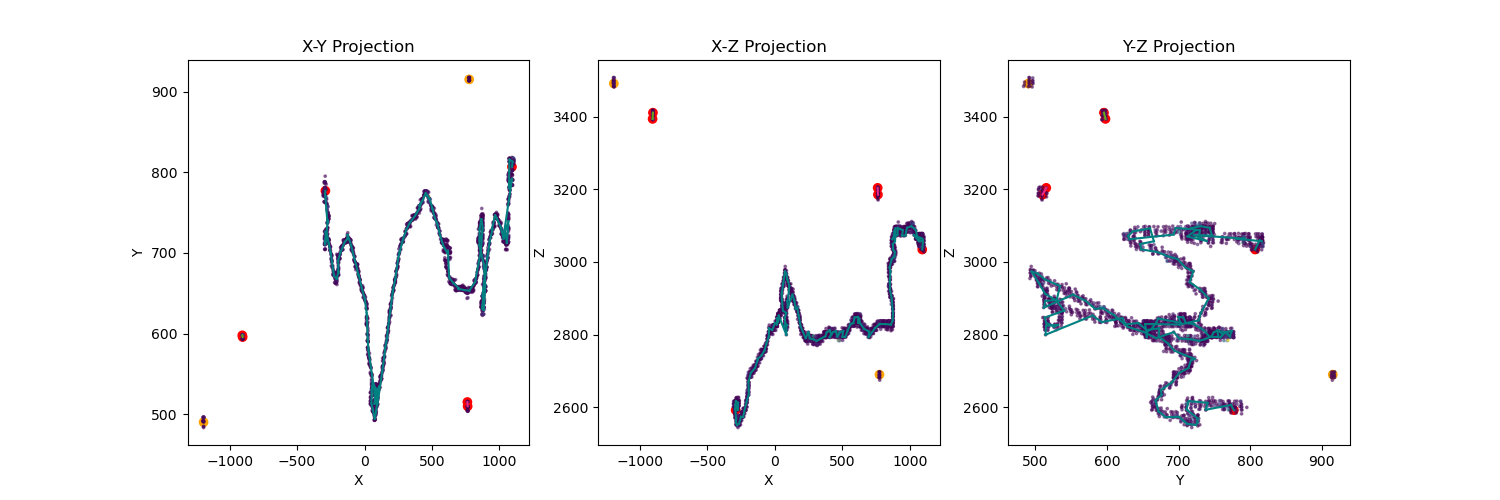

In [62]:
# Apply the tracking reconstruction

display(databin)


df, Tracks, connected_nodes, connection_count, pass_flag = RunTracking(databin[["event_id", "x", "y", "z", "energy"]], 0, 0)

df.index = df.id

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], df['x'], df['y'], connection_count, 'X', 'Y', Tracks)
axs[0].scatter(data.x, data.y, c=colors, marker='o', alpha=0.5,s=3)

# Plot xz projection
plot_tracks(axs[1], df['x'], df['z'], connection_count, 'X', 'Z', Tracks)
axs[1].scatter(data.x, data.z, c=colors, marker='o', alpha=0.5,s=3)

# Plot yz projection
plot_tracks(axs[2], df['y'], df['z'], connection_count, 'Y', 'Z', Tracks)
axs[2].scatter(data.y, data.z, c=colors, marker='o', alpha=0.5,s=3)

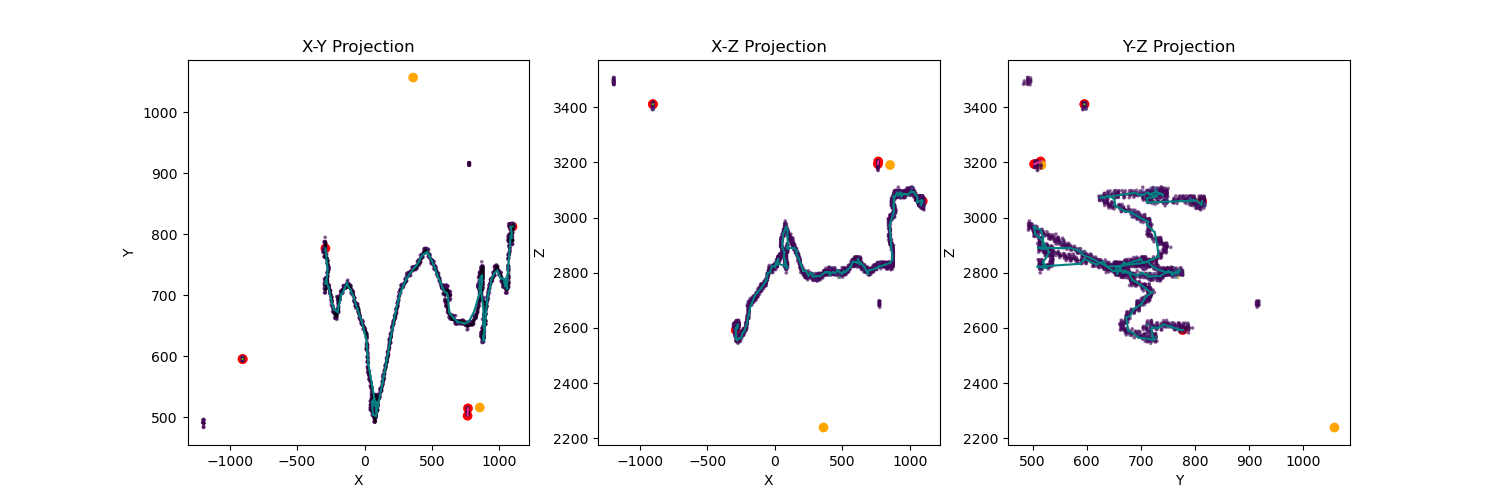

In [63]:
# Apply smoothing algorithm
# Compute rolling averages
r_size = 1

df['x_prev'] = df['x'].rolling(r_size, min_periods=1).mean().shift(1)
df['y_prev'] = df['y'].rolling(r_size, min_periods=1).mean().shift(1)
df['z_prev'] = df['z'].rolling(r_size, min_periods=1).mean().shift(1)

df['x_next'] = df['x'].iloc[::-1].rolling(r_size, min_periods=1).mean().iloc[::-1].shift(-1)
df['y_next'] = df['y'].iloc[::-1].rolling(r_size, min_periods=1).mean().iloc[::-1].shift(-1)
df['z_next'] = df['z'].iloc[::-1].rolling(r_size, min_periods=1).mean().iloc[::-1].shift(-1)

# Define projection function
def project_onto_line(p, a, b):
    """Project point p onto line defined by points a and b."""
    ap = p - a
    ab = b - a
    ab_unit = ab / np.linalg.norm(ab)  # Normalize
    proj_length = np.dot(ap, ab_unit)  # Scalar projection
    proj_point = a + proj_length * ab_unit  # Convert back to point
    return proj_point

# Apply projection for each row
for i in range(len(df)):
    p = np.array([df.loc[i, 'x'], df.loc[i, 'y'], df.loc[i, 'z']])
    a = np.array([df.loc[i, 'x_prev'], df.loc[i, 'y_prev'], df.loc[i, 'z_prev']])
    b = np.array([df.loc[i, 'x_next'], df.loc[i, 'y_next'], df.loc[i, 'z_next']])
    
    if not np.isnan(a).any() and not np.isnan(b).any():
        proj_p = project_onto_line(p, a, b)
        df.loc[i, ['x', 'y', 'z']] = proj_p  # Replace with projected point

# Drop helper columns if not needed
df.drop(columns=['x_prev', 'y_prev', 'z_prev', 'x_next', 'y_next', 'z_next'], inplace=True)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], df['x'], df['y'], connection_count, 'X', 'Y', Tracks)
axs[0].scatter(data.x, data.y, c=colors, marker='o', alpha=0.5,s=3)
axs[0].scatter(data_true['x'], data_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], df['x'], df['z'], connection_count, 'X', 'Z', Tracks)
axs[1].scatter(data_true['x'], data_true['z'], marker='o',c="k", s=0.1)
axs[1].scatter(data.x, data.z, c=colors, marker='o', alpha=0.5,s=3)

# Plot yz projection
plot_tracks(axs[2], df['y'], df['z'], connection_count, 'Y', 'Z', Tracks)
axs[2].scatter(data_true['y'], data_true['z'], marker='o',c="k", s=0.1)
axs[2].scatter(data.y, data.z, c=colors, marker='o', alpha=0.5,s=3)
